<a href="https://colab.research.google.com/github/abkerper/project_gss/blob/main/polview_age_visualizations_kiera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1_og= pd.read_parquet('/content/gss_chunk_1.parquet', engine='pyarrow')
df2_og = pd.read_parquet('/content/gss_chunk_2.parquet', engine='pyarrow')
df3_og = pd.read_parquet('/content/gss_chunk_3.parquet', engine='pyarrow')

In [3]:
#make dummy variables of the data
df1 = df1_og
df2 = df2_og
df3 = df3_og

In [37]:
df = pd.concat([df1, df2, df3], ignore_index = True )

DATA CLEANING

In [38]:
print(df['cappun'].value_counts())

favor                            42181
oppose                           18666
don't know                           0
iap                                  0
I don't have a job                   0
dk, na, iap                          0
no answer                            0
not imputable_(2147483637)           0
not imputable_(2147483638)           0
refused                              0
skipped on web                       0
uncodeable                           0
not available in this release        0
not available in this year           0
see codebook                         0
Name: cappun, dtype: int64


In [39]:
import numpy as np
cappun = df['cappun']
cappun = cappun.replace(['no answer', 'don\'t know','iap','refused','skipped on web', 'I don\'t have a job', 'dk, na, iap', 'not imputable_(2147483637)', 'not imputable_(2147483638)', 'uncodeable', 'not available in this release', 'not available in this year', 'see codebook'], np.nan)
cappun.value_counts()

favor     42181
oppose    18666
Name: cappun, dtype: int64

In [40]:
df['cappun'] = cappun

In [8]:
df1['age_category'] = df1['age']
df2['age_category'] = df2['age']
df3['age_category'] = df3['age']

In [29]:
for df in [df1, df2, df3]:
  df.loc[(df['age'] >= 18) & (df['age'] <= 29), 'age_category'] = 1
  df.loc[(df['age'] >= 30) & (df['age'] <= 39), 'age_category'] = 2
  df.loc[(df['age'] >= 40) & (df['age'] <= 49), 'age_category'] = 3
  df.loc[(df['age'] >= 50) & (df['age'] <= 64), 'age_category'] = 4
  df.loc[(df['age'] >= 60) & (df['age'] <= 89), 'age_category'] = 5

In [30]:
for df in [df1, df2, df3]:
  df['age'].replace(0, np.nan)
  df['age_category'].replace(0, np.nan)

In [11]:
age_category = df['age_category']
print(age_category.value_counts())

5.0    7160
2.0    4385
4.0    4184
3.0    4035
1.0    3775
Name: age_category, dtype: int64


In [12]:
polviews = df['polviews']
polviews = polviews.replace(['no answer', 'don\'t know','iap','refused','skipped on web', 'I don\'t have a job', 'dk, na, iap', 'not imputable_(2147483637)', 'not imputable_(2147483638)', 'uncodeable', 'not available in this release', 'not available in this year', 'see codebook'], np.nan)
polviews.value_counts()

moderate, middle of the road    8713
conservative                    3679
liberal                         3076
slightly conservative           3075
slightly liberal                2673
extremely liberal               1043
extremely conservative          1003
Name: polviews, dtype: int64

In [13]:
df['polviews'] = polviews #put cleaned variable back in df

In [14]:
print(df['relig'].value_counts())

protestant                       11173
none                              5326
catholic                          5264
christian                          745
jewish                             392
other                              308
buddhism                           200
muslim/islam                       136
hinduism                           117
orthodox-christian                 110
inter-nondenominational             64
other eastern religions             25
native american                     23
not imputable_(2147483638)           0
not available in this year           0
not available in this release        0
uncodeable                           0
skipped on web                       0
refused                              0
don't know                           0
not imputable_(2147483637)           0
no answer                            0
dk, na, iap                          0
I don't have a job                   0
iap                                  0
see codebook             

In [15]:
relig = df['relig']
relig = relig.replace(['not imputable_(2147483638)' ,
                       'not available in this year' ,
                       'not available in this release' ,
                       'uncodeable' ,
                       'skipped on web' ,
                       'refused' ,
                       "don't know" ,
                       'not imputable_(2147483637)' ,
                       'no answer' ,
                       'dk, na, iap' ,
                       "I don't have a job" ,
                       'iap' ,
                       'see codebook'], np.nan)
relig.value_counts()

protestant                 11173
none                        5326
catholic                    5264
christian                    745
jewish                       392
other                        308
buddhism                     200
muslim/islam                 136
hinduism                     117
orthodox-christian           110
inter-nondenominational       64
other eastern religions       25
native american               23
Name: relig, dtype: int64

In [16]:
relig = relig.replace(['christian', 'inter-nondenominational', 'orthodox-christian'], 'christianity')
relig = relig.replace(['none', 'other', 'other eastern religions'], 'none/other')
relig.value_counts()

protestant         11173
none/other          5659
catholic            5264
christianity         919
jewish               392
buddhism             200
muslim/islam         136
hinduism             117
native american       23
Name: relig, dtype: int64

In [17]:
df['relig'] = relig #put cleaned variable back in df

In [24]:
print(pd.crosstab(cappun,relig),'\n')
print(pd.crosstab(cappun,polviews),'\n')
print(pd.crosstab(cappun,age_category, normalize = 'all'),'\n')

relig   protestant  catholic  jewish  none/other  buddhism  hinduism  \
cappun                                                                 
favor         6432      3086     236        3501       107        79   
oppose        2456      1216      99        1296        51        27   

relig   muslim/islam  christianity  native american  
cappun                                               
favor             90           557               15  
oppose            26           216                5   

polviews  extremely liberal  liberal  slightly liberal  \
cappun                                                   
favor                   635     1824              1596   
oppose                  256      714               617   

polviews  moderate, middle of the road  slightly conservative  conservative  \
cappun                                                                        
favor                             5195                   1785          2137   
oppose                 

RESULTS

In [41]:
print(pd.crosstab(df['cappun'], df['polviews']))

polviews  conservative  extremely conservative  extremely liberal  liberal  \
cappun                                                                       
favor             6968                    1598                820     3661   
oppose            1733                     423               1136     3361   

polviews  moderate, middle of the road  slightly conservative  \
cappun                                                          
favor                            15752                   6789   
oppose                            6132                   2125   

polviews  slightly liberal  
cappun                      
favor                 4551  
oppose                2760  


Text(0.5, 1.0, 'Political Views and Capital Punishment Opinion')

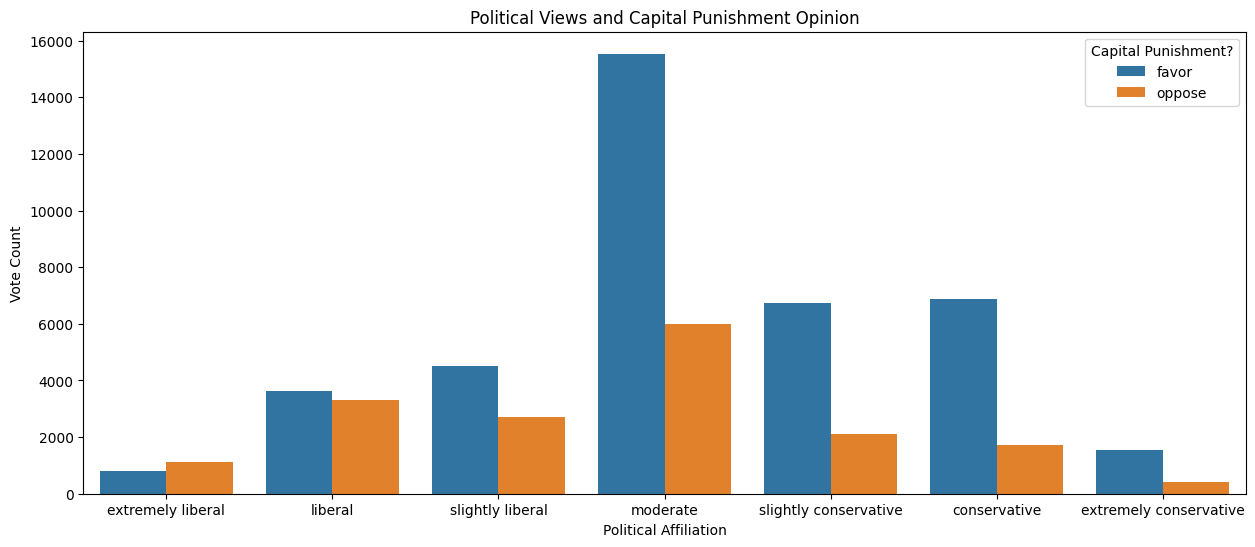

In [23]:
import matplotlib.pyplot as plt
data_from_groupby = {'polviews': ['extremely liberal', 'extremely liberal', 'liberal', 'liberal', 'slightly liberal', 'slightly liberal',
                 'moderate', 'moderate', 'slightly conservative', 'slightly conservative',
                 'conservative', 'conservative', 'extremely conservative', 'extremely conservative'],
    'Capital Punishment?': ['favor', 'oppose', 'favor', 'oppose', 'favor', 'oppose', 'favor', 'oppose', 'favor', 'oppose', 'favor', 'oppose', 'favor', 'oppose'],
    'count': [811, 1110, 3625, 3297, 4515, 2722, 15538, 6005, 6720, 2104, 6865, 1707, 1560, 416]
}
df = pd.DataFrame(data_from_groupby)

plt.figure(figsize=(15, 6))
sns.barplot(x='polviews', y='count', hue='Capital Punishment?', data=df)
plt.xlabel('Political Affiliation')
plt.ylabel('Vote Count')
plt.title('Political Views and Capital Punishment Opinion')

In [31]:
print(pd.crosstab(df['cappun'], df['age_category']))

age_category   1.0   2.0   3.0   4.0   5.0
cappun                                    
favor         1980  2415  2372  2513  4134
oppose        1478  1563  1253  1304  2380


Text(0.5, 1.0, 'Religion and Capital Punishment Opinion')

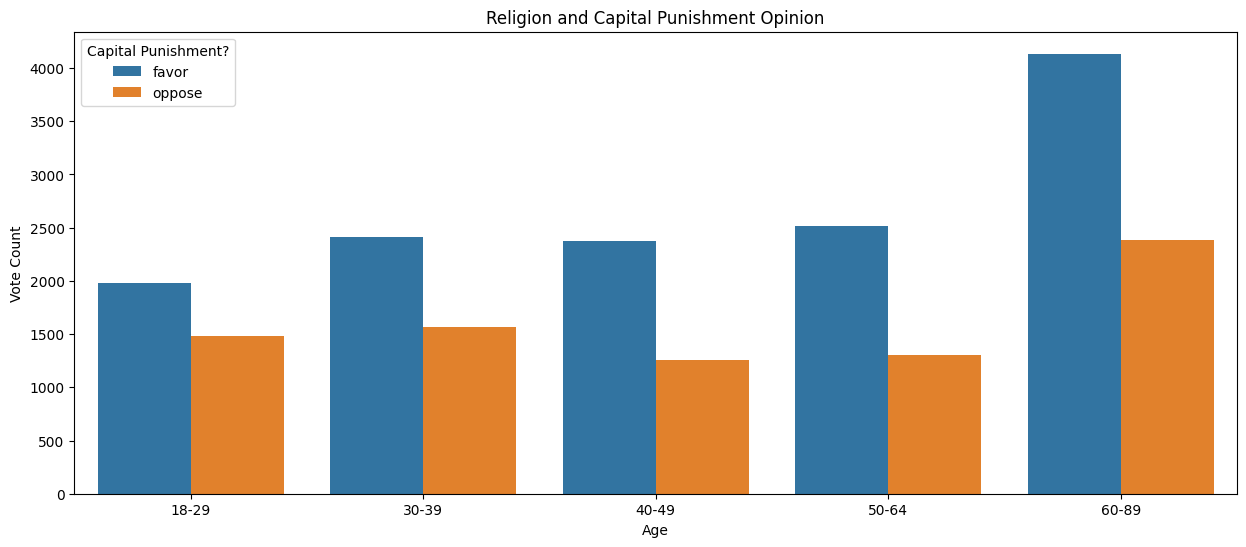

In [32]:
data_from_groupby = {'age_group': ['18-29', '18-29', '30-39', '30-39', '40-49', '40-49',
                 '50-64', '50-64', '60-89', '60-89'],
    'Capital Punishment?': ['favor', 'oppose', 'favor', 'oppose', 'favor', 'oppose', 'favor', 'oppose', 'favor', 'oppose'],
    'count': [1980, 1478, 2415, 1563, 2372, 1253, 2513, 1304, 4134, 2380]
}
df = pd.DataFrame(data_from_groupby)

plt.figure(figsize=(15, 6))
sns.barplot(x='age_group', y='count', hue='Capital Punishment?', data=df)
plt.xlabel('Age')
plt.ylabel('Vote Count')
plt.title('Religion and Capital Punishment Opinion')

APPENDIX

In [19]:
df.loc[:,['age_category','polviews','cappun']].groupby(['age_category', 'polviews']).describe()

cappun                     
                                           count unique     top  freq
age_category polviews                                                
1.0          extremely liberal               191      2  oppose   139
             liberal                         517      2  oppose   295
             slightly liberal                490      2  oppose   259
             moderate, middle of the road   1313      2   favor   829
             slightly conservative           387      2   favor   269
             conservative                    352      2   favor   251
             extremely conservative           81      2   favor    57
2.0          extremely liberal               199      2  oppose   127
             liberal                         562      2  oppose   349
             slightly liberal                502      2   favor   282
             moderate, middle of the road   1510      2   favor   986
             slightly conservative           488      2   favor   341
             conservative                    469      2   favor   351
             extremely conservative          124      2   favor    91
3.0          extremely liberal               154      2  oppose    96
             liberal                         457      2  oppose   243
             slightly liberal                415      2   favor   226
             moderate, middle of the road   1335      2   favor   927
             slightly conservative           487      2   favor   356
             conservative                    539      2   favor   425
             extremely conservative          144      2   favor   110
4.0          extremely liberal               152      2  oppose   101
             liberal                         433      2  oppose   254
             slightly liberal                386      2   favor   222
             moderate, middle of the road   1351      2   favor   921
             slightly conservative           541      2   favor   390
             conservative                    677      2   favor   537
             extremely conservative          171      2   favor   141
5.0          extremely liberal               259      2  oppose   179
             liberal                         797      2  oppose   508
             slightly liberal                641      2   favor   321
             moderate, middle of the road   2157      2   favor  1410
             slightly conservative           857      2   favor   612
             conservative                   1264      2   favor  1011
             extremely conservative          374      2   favor   304

In [20]:
df.loc[:,['age_category','relig','cappun']].groupby(['age_category', 'relig']).describe()

cappun                     
                              count unique     top  freq
age_category relig                                      
1.0          protestant        1167      2   favor   717
             catholic           735      2   favor   423
             jewish              35      2  oppose    21
             none/other        1270      2   favor   683
             buddhism            25      2   favor    17
             hinduism            21      2  oppose    11
             muslim/islam        27      2  oppose    14
             christianity       157      2   favor    88
             native american      5      2   favor     4
2.0          protestant        1513      2   favor   999
             catholic           822      2   favor   512
             jewish              49      2  oppose    28
             none/other        1247      2   favor   682
             buddhism            34      2   favor    17
             hinduism            32      2   favor    17
             muslim/islam        39      2   favor    22
             christianity       215      2   favor   135
             native american      2      1  oppose     2
3.0          protestant        1605      2   favor  1116
             catholic           827      2   favor   519
             jewish              45      2   favor    24
             none/other         858      2   favor   538
             buddhism            35      2  oppose    21
             hinduism            24      2  oppose    15
             muslim/islam        29      2   favor    15
             christianity       168      2   favor   119
             native american      6      2  oppose     4
4.0          protestant        1943      2   favor  1327
             catholic           852      2   favor   543
             jewish              61      2   favor    36
             none/other         744      2   favor   455
             buddhism            31      2   favor    21
             hinduism             5      2   favor     3
             muslim/islam        17      2   favor    10
             christianity       139      2   favor    97
             native american      3      1   favor     3
5.0          protestant        3613      2   favor  2469
             catholic          1514      2   favor   903
             jewish             164      2   favor   104
             none/other         975      2   favor   505
             buddhism            53      2  oppose    30
             hinduism            18      2   favor    10
             muslim/islam         9      2   favor     5
             christianity       131      2   favor    92
             native american      6      2   favor     4